<a href="https://colab.research.google.com/github/dzakmu/MachineLearningC1/blob/main/TugasPraktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 2 Praktikum Machine Learning C1
 Nama: Muhammad Dzaky Mu'ammar

 NIM : 24060122130064


# 1. Melakukan Clustering menggunakan dataset iris

### a. Import dataset

In [2]:
import sys
sys.version
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
print(dataset.shape)
(3000, 2)
print(dataset.head(20))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

Pada bagian sebelumnya telah didefinisikan list dari feature - feature yang ada pada dataset iris, yaitu: ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']. Feature tersebut secara otomatis terurutkan yang dimulai dari index ke nol, berikut adalah bagaimana list tersebut terurutkan:

*   Index 0: sepal-length
* Index 1: sepal-width
* Index 2: petal-length
* Index 3: petal-width
* Index 4: class (ini adalah sebuah label untuk data tersebut, bukanlah feature)

Berdasarkan pengurutannya, maka feature dua dan tiga adalah petal-length dan petal-width, sehingga yang digunakan untuk clustering adalah kedua feature tersebut.

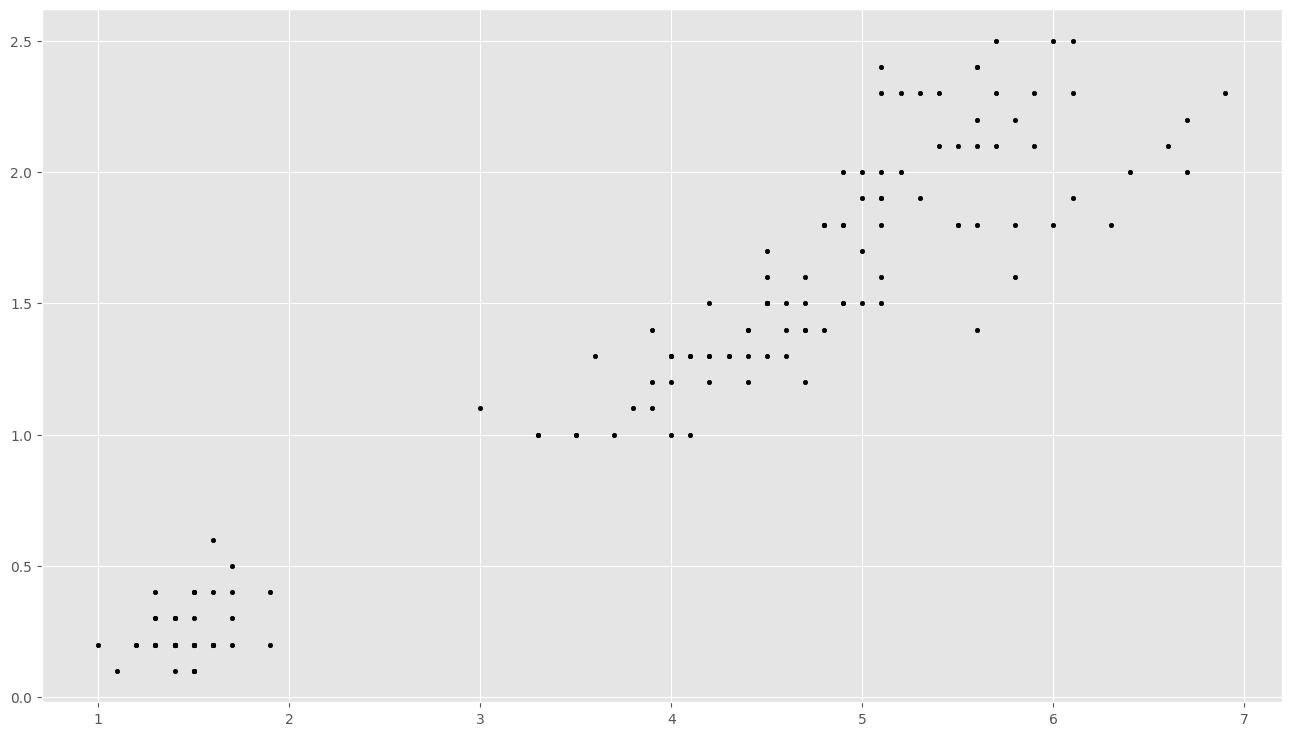

In [4]:
f1 = dataset['petal-length'].values
f2 = dataset['petal-width'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=10)

Sebelum melakukan clustering perlu mengekstraksi data yaitu memilih feature mana yang akan digunakan, pada clustering ini akan digunakan feature 2 dan 3 yaitu, petal-length disefinisikan f1 dan petal-width didefinisikan f2. Setelah itu data diplot dengan nilai f1 berada pada sumbu x dan nilai f2 pada sumbu y. Titik-titik ini diwarnai hitam (c='black') dan memiliki ukuran 10 (s=10). Dari proses diatas akan menghasilkan sebuah gambar yang menunjukkan plot sebar dengan panjang kelopak pada sumbu x dan lebar kelopak pada sumbu y. Titik-titik tersebut terkelompok menjadi beberapa grup yang terpisah, yang secara visual menunjukkan adanya hubungan antara kedua fitur tersebut. Secara umum, seiring peningkatan panjang kelopak, lebar kelopak juga meningkat, yang terlihat dari pembentukan kluster sepanjang garis tren dari kiri bawah ke kanan atas plot.

### b. Melakukan Clustering

In [6]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
# Fitting input data
kmeans = kmeans.fit(X)
# Menampilkan cluster
labels = kmeans.predict(X)
# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
# Mencetak nilai centroid
print(C)

[[5.59583333 2.0375    ]
 [1.464      0.244     ]
 [4.26923077 1.34230769]]


Kodingan diatas akan menghasilkan koordinat dari centroid untuk masing-masing dari cluster (berdasarkan cluster yang telah didefinisikan sebelumnya, jika 3 nilai centroid yang muncul ada 3 cluster, jika 4 nilai centroid yang muncul ada 4 cluster dst.). Nilai-nilai ini menunjukkan rata-rata (atau titik tengah) dari fitur-fitur dalam dataset X untuk setiap cluster:

* Cluster pertama memiliki centroid di koordinat (5.59583333, 2.0375)

* Cluster kedua di koordinat (1.464, 0.244).

* Cluster ketiga di koordinat (4.26923077, 1.34230769).

Centroid ini membantu dalam menganalisis karakteristik dari masing-masing cluster yang terbentuk, dan biasanya digunakan untuk menginterpretasi hasil clustering dalam konteks data yang lebih besar atau lebih kompleks.



### c. Plot Hasil Clustering

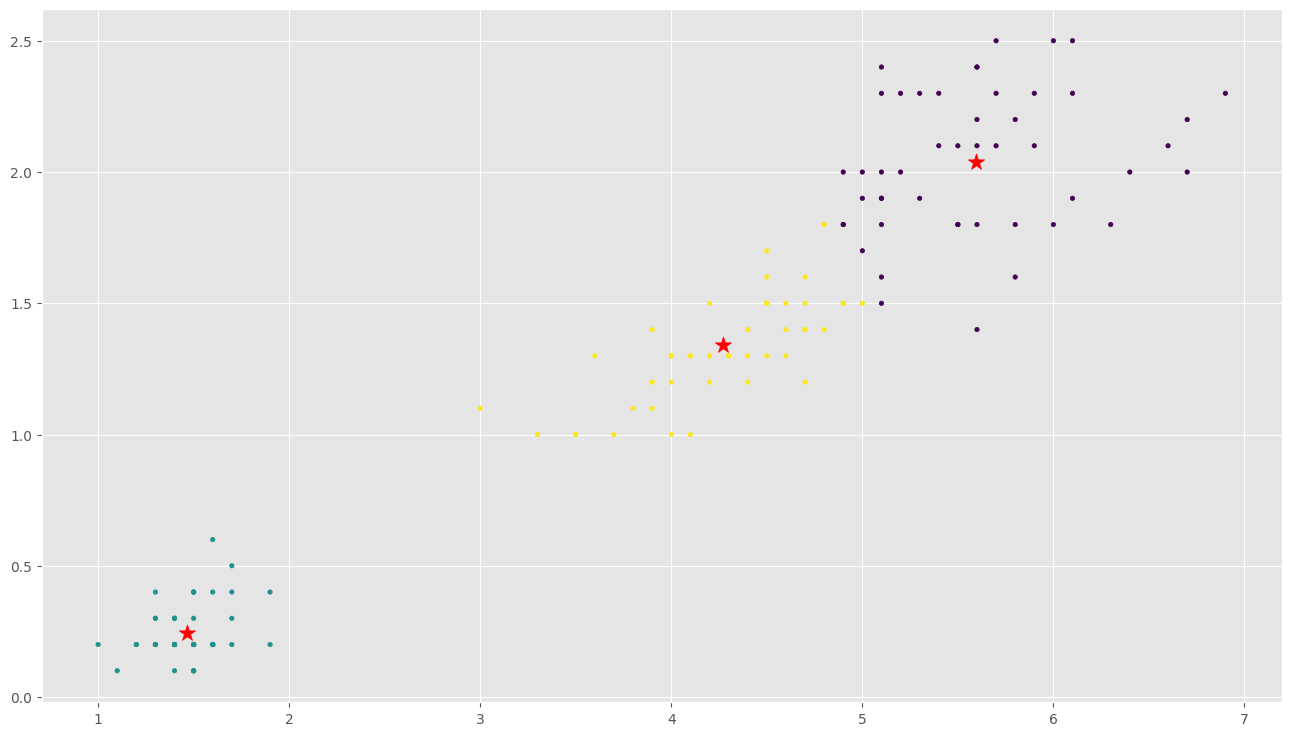

In [7]:
plt.scatter (X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=150)

Kodingan diatas akan menghasilkan sebuah visualisasi yang mana visualisasi ini sangat berguna untuk memahami bagaimana data terbagi menjadi cluster berdasarkan dua fitur yang diplot. Penggunaan warna berbeda untuk masing-masing cluster dan penandaan centroid memudahkan interpretasi visual dari hasil clustering, membantu dalam menilai kualitas clustering (misalnya, seberapa baik data terkelompok dan seberapa jauh jarak antar cluster).

# 2. Melakukan Evaluasi Hasil Clustering

### a. Menggunakan Sum of Square Distances

In [9]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, [2, 3]]
for k in range (1, 10):
  # Menentukan Jumlah Cluster
  kmeans = KMeans(n_clusters=k, random_state = 1)
  # Fitting Input Data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster labels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak antara setiap sample dengan cluster centroid-nya(SSE)
  interia = kmeans.inertia_
  print ("k:",k, "const:", interia)

k: 1 const: 550.8953333333333
k: 2 const: 86.39021984551391
k: 3 const: 31.371358974358966
k: 4 const: 19.503256907603898
k: 5 const: 16.46923244932984
k: 6 const: 11.883567653148212
k: 7 const: 9.308601966873704
k: 8 const: 8.589204182085307
k: 9 const: 6.68705643390426


Kode ini menjalankan K-Means clustering untuk nilai k dari 1 hingga 9. Untuk setiap nilai k, model diinisialisasi dan di-fit pada data X yang mana data X adalah feature kedua dan ketiga yaitu petal-lenght dan petal-width, dan nilai inertia (SSE) yang dihasilkan dicetak. Inertia diukur sebagai jumlah jarak kuadrat dari setiap titik data ke centroid terdekatnya.


Output menunjukkan nilai inertia untuk setiap nilai k dari 1 hingga 9:

* k=1: Inertia sangat tinggi karena hanya ada satu cluster yang mencakup semua titik data.

* k=2 - 9: Terjadi penurunan inertia secara signifikan ketika k meningkat dari 1 ke 2 dan seterusnya, menunjukkan peningkatan homogenitas dalam setiap cluster. Penurunan inertia menjadi lebih lambat setelah nilai k tertentu, yang bisa membantu dalam menentukan jumlah cluster optimal.

b. Menggunakan Silhoutte Score

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, [2, 3]]
silhouette_score(X, labels)

0.4394054801735338

Kode ini menghitung silhoutte skor dari hasil clustering. X adalah data yang digunakan untuk clustering, dan labels adalah label cluster yang diperoleh dari model clustering seperti K-Means. Skor siluet mengukur seberapa baik sampel dikelompokkan ke dalam cluster-nya dan seberapa terpisah antara cluster yang berbeda. Nilai ini berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa cluster lebih padat dan terpisah dengan baik.

Output
* 0.4390454801735338: Ini adalah nilai skor siluet untuk clustering yang dilakukan. Nilai ini menunjukkan kinerja yang moderat. Meskipun cluster cukup terpisah, masih ada ruang untuk peningkatan dalam hal pemadatan dalam cluster atau pemisahan antar-cluster. Nilai mendekati 1 akan menunjukkan kinerja clustering yang sangat baik, di mana cluster jelas terpisah satu sama lain dengan sedikit atau tanpa tumpang tindih.

# 3. Elbow Method

### a. import library

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.cluster import KMeans

Kode diatas berfungsi untuk mengimport library yang dibutuhkan untuk menentukan elbow method

### b. Data

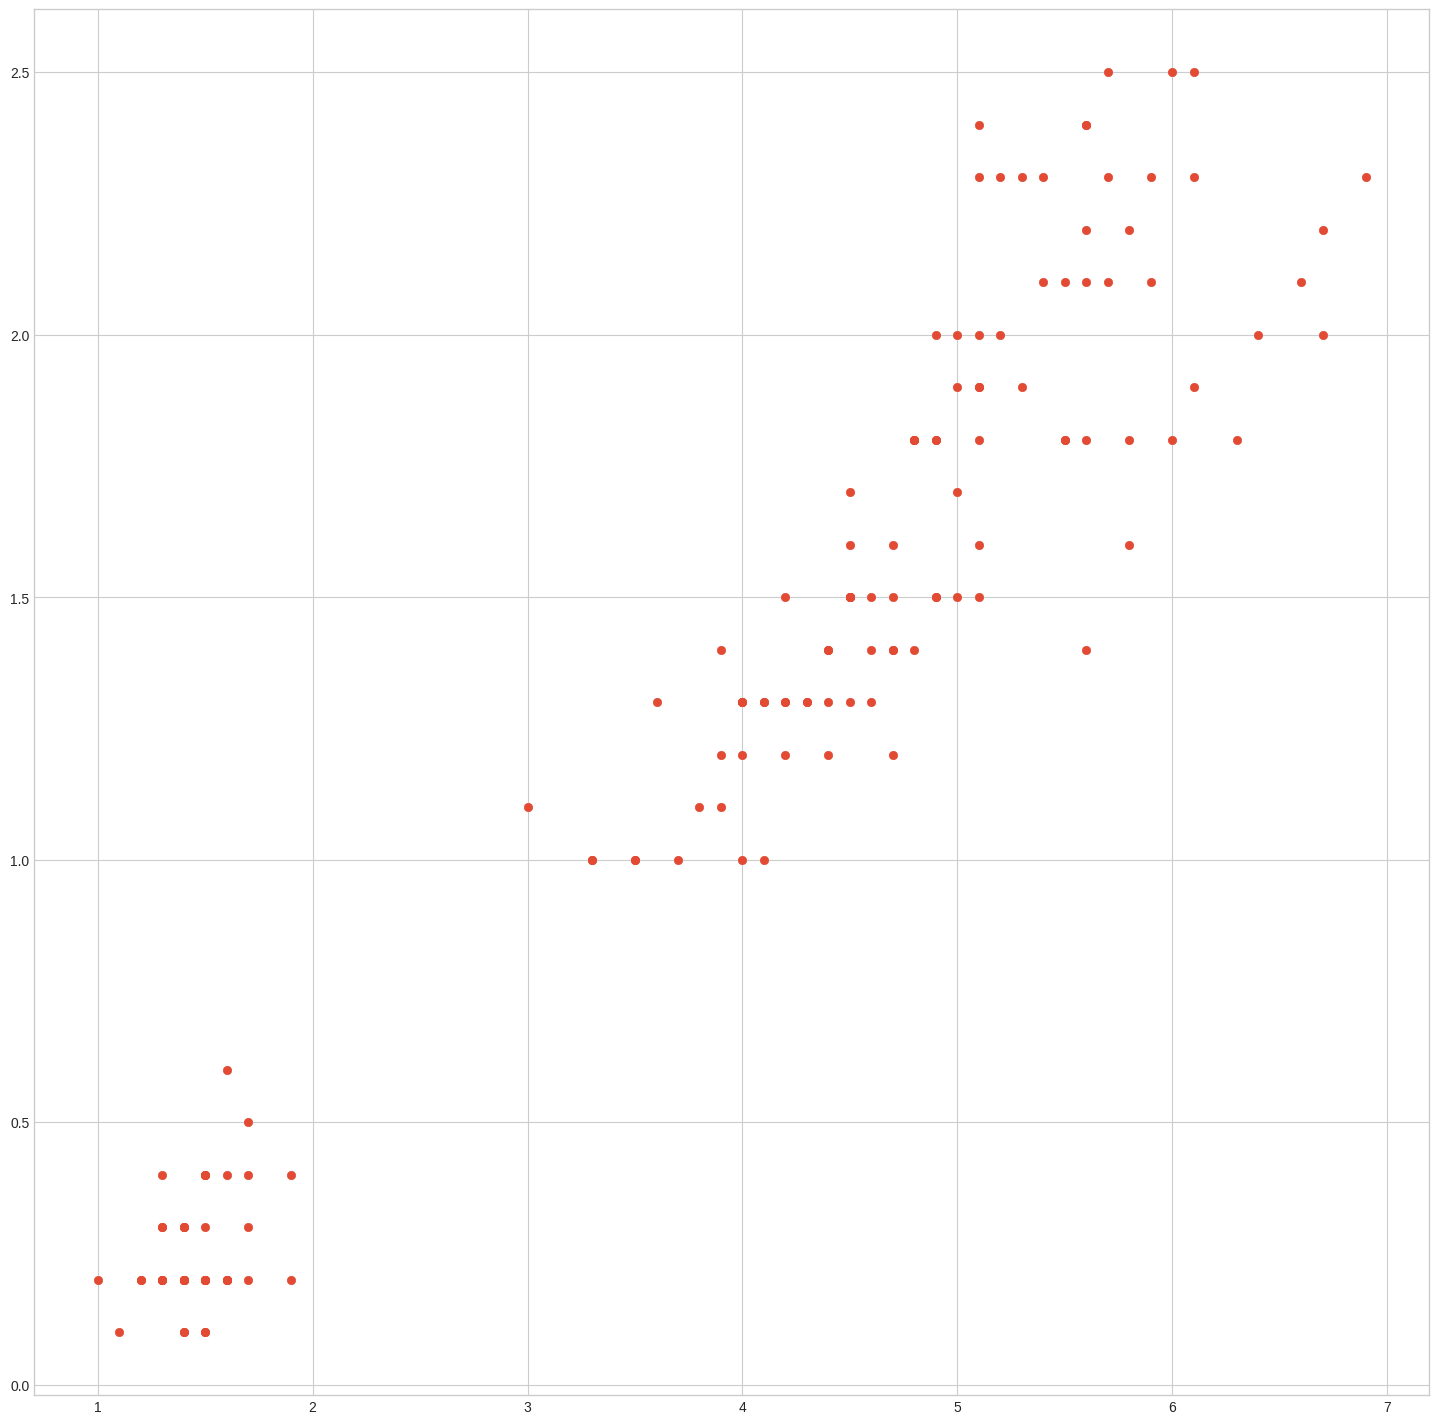

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.plot()
plt.scatter(features[2], features[3])
plt.show()

Kode yang diatas mengilustrasikan cara untuk memuat dataset Iris menggunakan scikit-learn dan membuat scatter plot untuk dua fitur tertentu dari dataset tersebut, yaitu petal length dan petal width.

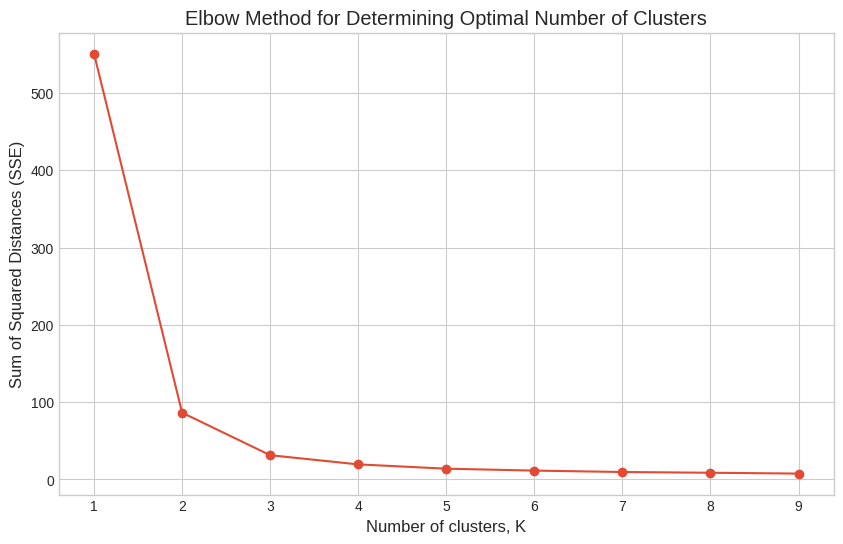

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Selecting Petal Length and Petal Width

SSE = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    SSE.append(km.inertia_)

# Plotting the SSE to see the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, SSE, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters, K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(list(K))
plt.grid(True)
plt.show()


Tujuan utama dari kode ini adalah untuk membantu untuk menentukan jumlah optimal cluster untuk algoritma K-Means dalam konteks dataset Iris berdasarkan dua fitur tertentu. Metode Elbow yang digunakan adalah pendekatan visual dan intuitif untuk menemukan jumlah cluster yang tepat yang dapat meminimalkan variasi dalam cluster dan maksimalkan variasi antar cluster.

Dengan menggunakan plot ini,dapat diketahui dengan mudah bahwa penurunan nilai SSE mulai melambat pada titik tertentu (k=3 pada umumnya), yang menunjukkan bahwa menambahkan lebih banyak cluster setelah titik itu tidak memberikan keuntungan yang besar dalam memisahkan data lebih lanjut. Dalam kasus dataset Iris, ini secara khusus bermanfaat karena sudah diketahui bahwa terdapat tiga spesies Iris, sehingga analisis ini memberikan konfirmasi visual dan analitis bahwa tiga cluster merupakan pilihan yang baik.

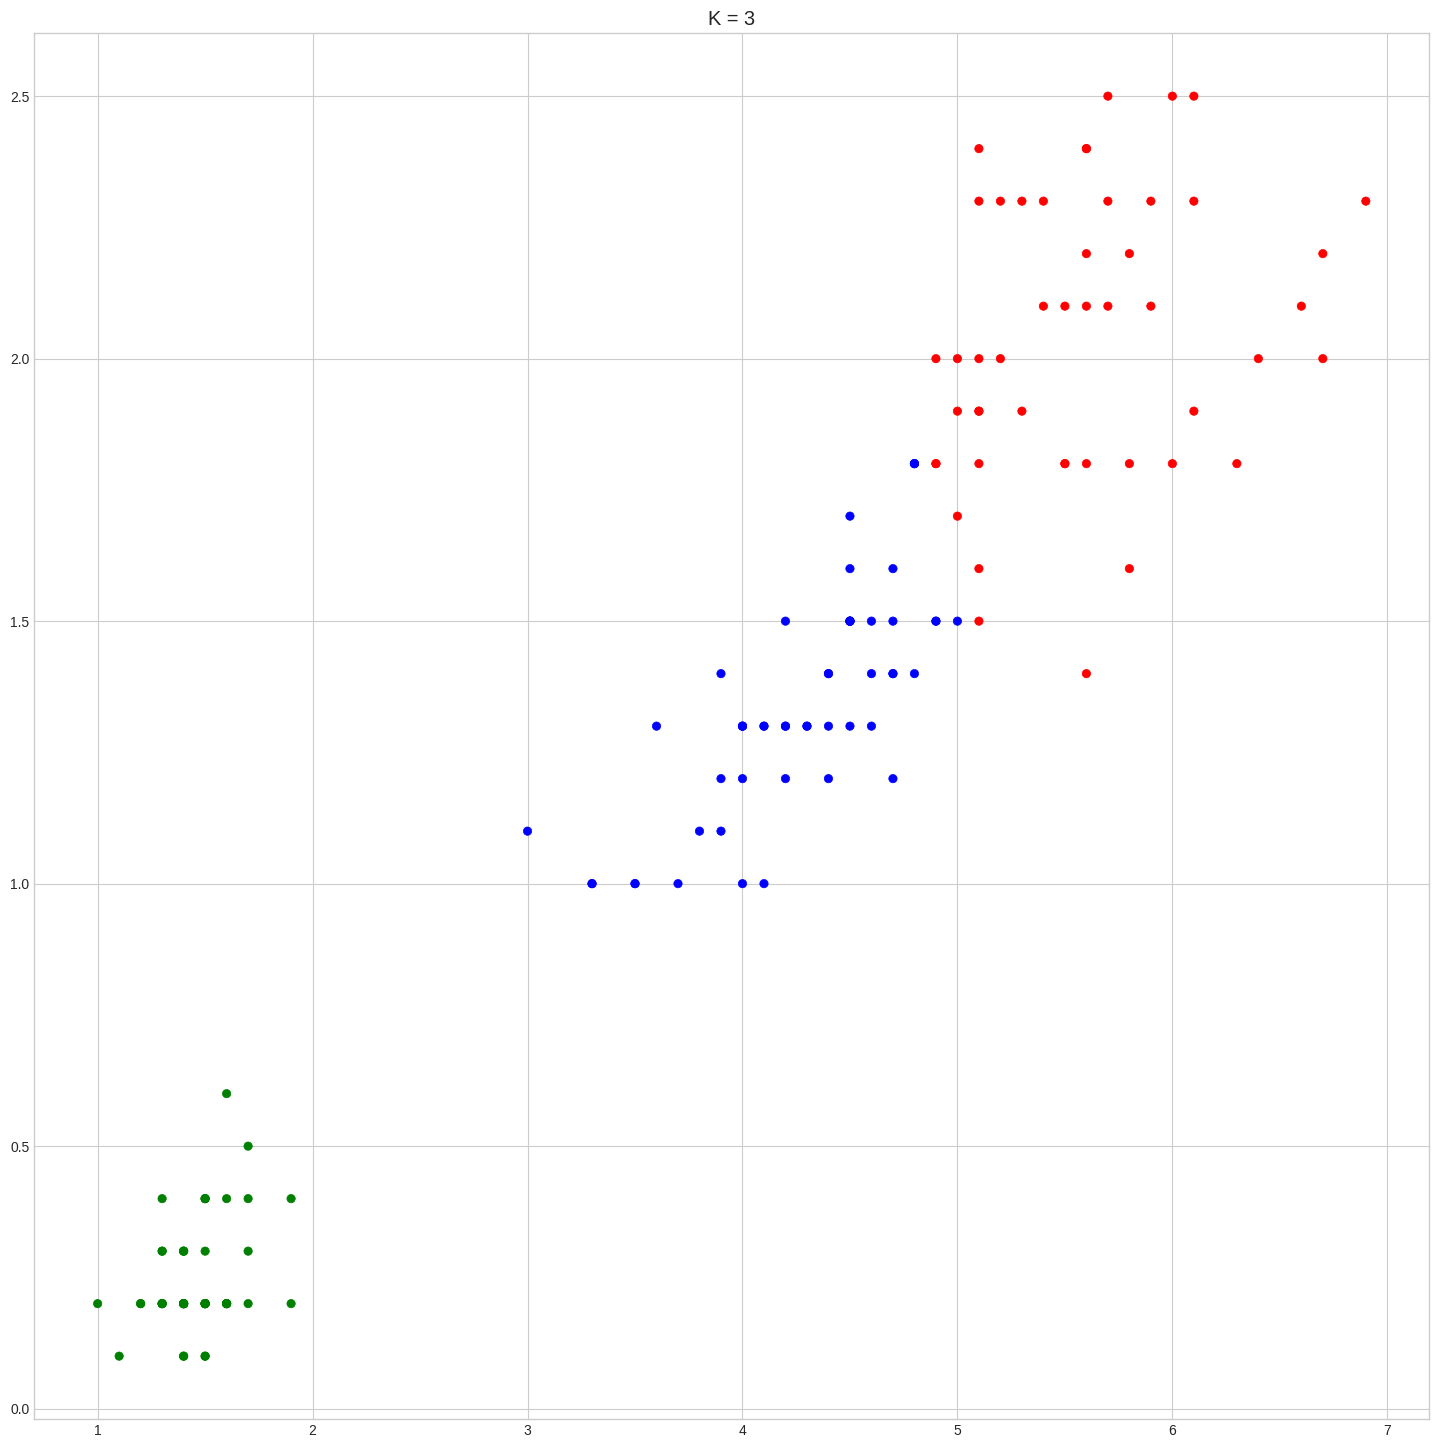

In [15]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features[2], features[3], c=label_color)
plt.title('K = 3')
plt.show()

Tujuan dari kode ini adalah untuk mengklasifikasikan sampel-sampel Iris ke dalam tiga cluster berdasarkan ukuran petal mereka dan kemudian visualisasi hasilnya dengan cara yang mudah dipahami. Dengan memberi warna yang berbeda pada setiap cluster, kita dapat dengan jelas melihat bagaimana data terbagi dan seberapa efektif K-Means dalam mengelompokkan data berdasarkan fitur yang dipilih.

Plot yang dihasilkan akan menunjukkan distribusi titik-titik data dengan warna yang berbeda, memungkinkan melihat pembagian cluster dan menganalisis apakah pembagian tersebut masuk akal berdasarkan karakteristik data yang ada. Ini sangat berguna untuk evaluasi awal performa model clustering sebelum digunakan lebih lanjut dalam analisis atau prediksi data baru